In [1]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
import sys
sys.path.append('../../')

from astroLuSt.styles import plot_styles as alstps
from astroLuSt.visualization import plotting as alvipg

importlib.reload(alvipg)
importlib.reload(alstps)

#style for plotting
_ = alstps.tre_light()

# Generate Data

In [2]:
X, y = make_blobs(100, 2, centers=5)

# `generate_categorical_cmap()`
* Generating custom categorical colormaps

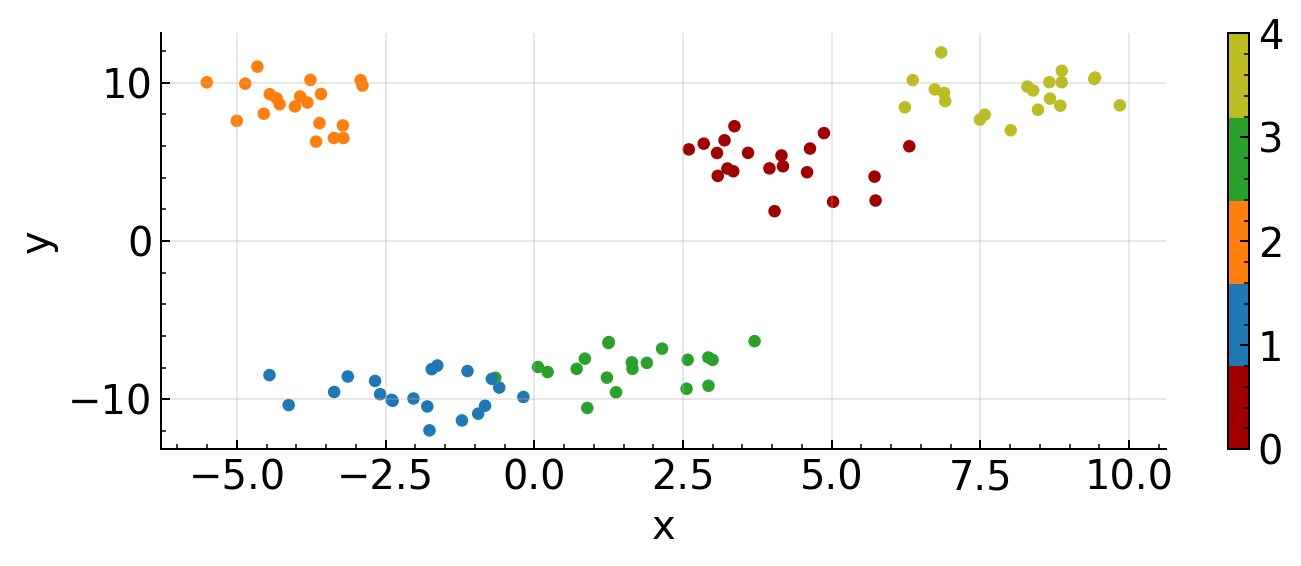

In [3]:

colors = [(161/255,0,0,1), "tab:blue", "tab:orange", "tab:green", "tab:olive"]
cmap = alvipg.generate_categorical_cmap(colors, res=256)

fig = plt.figure(figsize=(9,3))
ax = fig.add_subplot(111)
sctr = ax.scatter(*X.T, c=y, cmap=cmap)
cbar = fig.colorbar(sctr, ax=ax)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

# `generate_colors()`
* generate array of colors based on some colormap

[[0.         0.         0.         1.        ]
 [0.09428283 0.         0.10773737 1.        ]
 [0.18856566 0.         0.21547475 1.        ]]


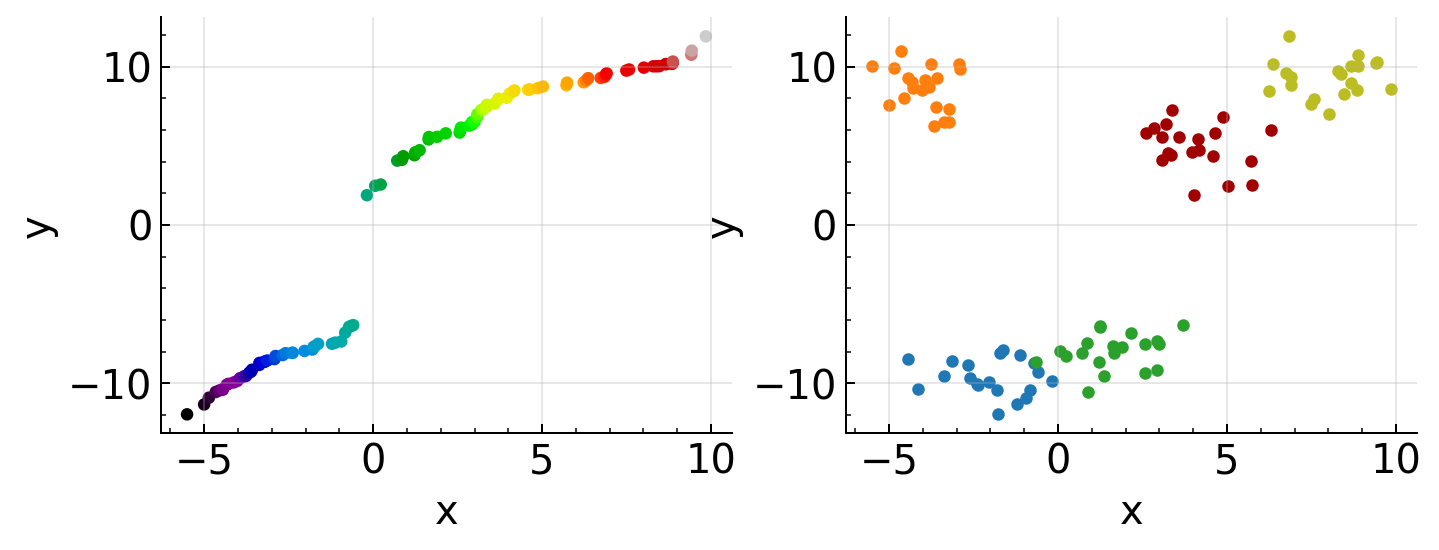

In [4]:
colors1 = alvipg.generate_colors(
    X.shape[0],
    vmin=None, vmax=None, vcenter=None,
    ncolors=None, cmap="nipy_spectral"
)
colors2 = alvipg.generate_colors(y, cmap=cmap)
print(colors1[0:3])


fig = plt.figure(figsize=(9,3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sctr1 = ax1.scatter(*np.sort(X, axis=0).T, c=colors1)
for idx, yi in enumerate(np.unique(y)):
    b = (y == yi)
    sctr2 = ax2.scatter(*X[b].T, color=colors2[idx])
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
plt.show()

# Merging Figures

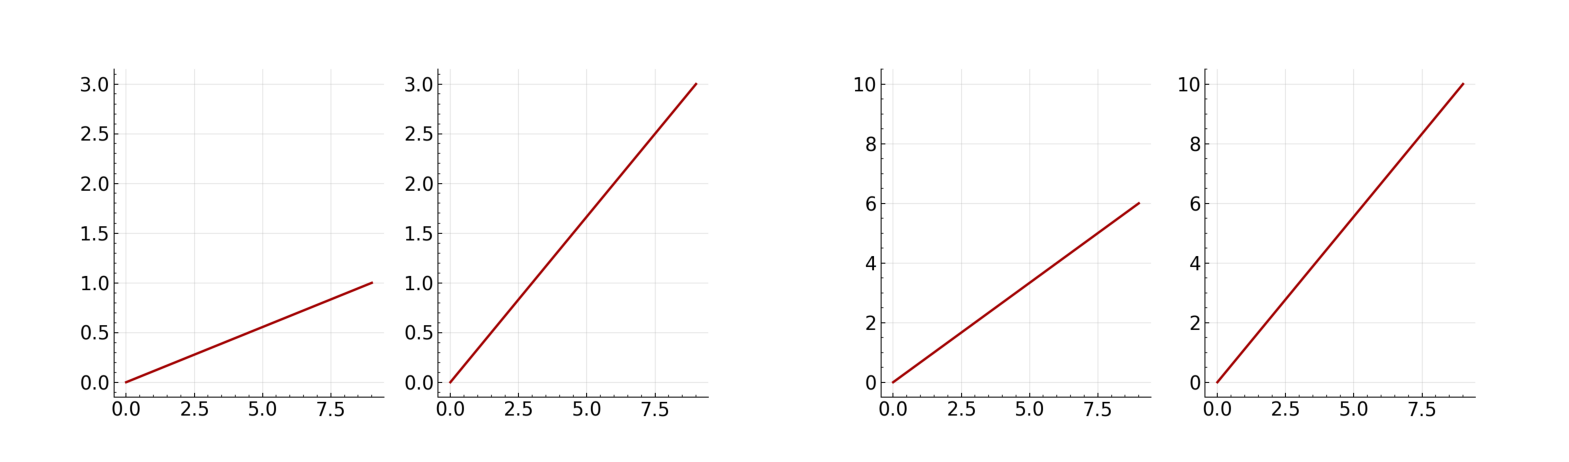

In [5]:
importlib.reload(alvipg)

#one fig
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax2 = fig1.add_subplot(122, sharey=ax1)
ax1.plot(np.linspace(0,1,10))
ax2.plot(np.linspace(0,3,10))
fig1.savefig('../_gfx/merge_test1.png')
plt.close()


#another fig
fig2 = plt.figure()
ax1 = fig2.add_subplot(121)
ax2 = fig2.add_subplot(122, sharey=ax1)
ax1.plot(np.linspace(0,6,10))
ax2.plot(np.linspace(0,10,10))
fig1.savefig('../_gfx/merge_test2.png')
plt.close()

#combined fig (stack horizontal)
fig, axs = plt.subplots(1,2)
for ax in fig.axes: ax.axis('off')
fig, axs = alvipg.merge_figures(
    figs=[fig1, fig2],
    # figs=['../_gfx/merge_test1.png', fig2],
    fig=fig,
)
plt.tight_layout(h_pad=0, w_pad=0)